## Problem 2
Anonumous code: 

Could not import Matplotlib backends. Probarbly due to missing Qt.


c:\Users\mrmar\PycharmProjects\pythonProject3\.venv\Lib\site-packages\calfem\vis_mpl.py:516: UserWarning: You passed a edgecolor/edgecolors ((0, 0, 0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, edgecolor=color, color="none", marker=marker_type)


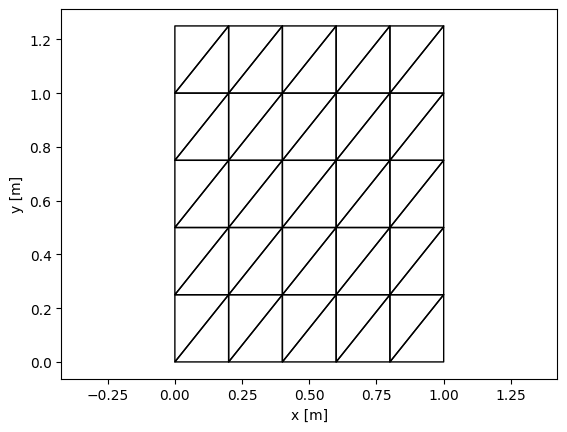

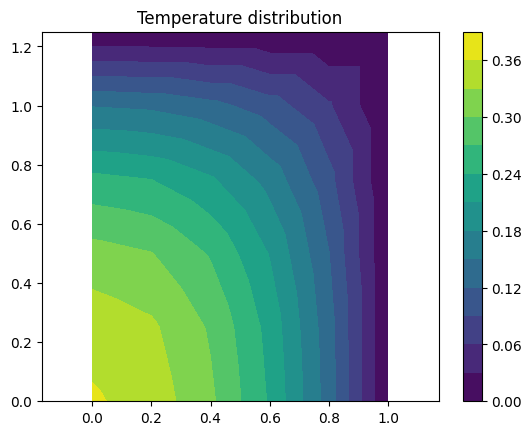

In [1]:
"""
Problem 2 
anonymous code: 
"""

# General packages
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# CALFEM packages
import calfem.core as cfc
import calfem.vis_mpl as cfv

# Load mesh data
mesh = scipy.io.loadmat('mesh_data.mat') 
Coord = mesh['Coord']                         # [x, y] coords for each node
Dofs = mesh['Dofs']                           
Edof = mesh['Edof']                           # [element number, dof1, dof2, dof3]
Ex = mesh['Ex']                                
Ey = mesh['Ey']      
bottom_dofs = mesh['bottom_dofs']                          
right_dofs = mesh['right_dofs']                          
top_dofs = mesh['top_dofs']                          
left_dofs = mesh['left_dofs']                          

# Plot the mesh
plotpar = np.array([1, 1, 2]) # parameters for line style, color, marker 
cfv.eldraw2(Ex, Ey, plotpar)
plt.xlabel("x [m]")
plt.ylabel("y [m]")

# load reference solution vector
a_ref = scipy.io.loadmat('solution.mat')['solution_vector'] 
Ed = cfc.extract_ed(Edof[:, 1:4], a_ref)

# plot reference temperature, you can use this as a check against your own result.
plt.figure()
plt.title("Temperature distribution")
plt.axis("equal")
cfv.draw_nodal_values_contourf(a_ref, Coord, Edof[:, 1:4])
plt.colorbar()
plt.show()

#-------------------------------
# Start your implementation here


In [76]:
k = 1.0 # Heat conduction
eq = 1.0 # Heat supply 
ep = [k]
D = np.eye(2)
# Assemble system of equations using the Calfem function flw2te
ndofs = np.max(np.max(Edof[:,1:]))
nel = Edof.shape[0]
K = np.zeros((ndofs, ndofs))
f = np.zeros((ndofs, 1))
for el in range(nel):
    Ke, fe = cfc.flw2te(Ex[el, :], Ey[el, :], ep, D, eq)
    cfc.assem(Edof[el, 1:], K, Ke, f, fe)
# boundary conditions
bc_dofs = np.hstack([right_dofs, top_dofs])[0]
bc_vals = np.zeros_like(bc_dofs)

# solve sys of eqns
a, r = cfc.solveq(K, f, bc_dofs, bc_vals)

# Check difference between my solution and given reference solution should be ≈ 0 
display(np.linalg.norm(a - a_ref))


# e) Temperature in point x which lies in element 18
el = 18
xe = Ex[el-1, :]
ye = Ey[el-1, :]
x = 0.650 # [m]
y = 0.375 # [m]
Ae = ((xe[1] * ye[2] - xe[2] * ye[1]) - (xe[0] * ye[2] - xe[2] * ye[0]) + (xe[0] * ye[1] - xe[1] * ye[0]))/2
Ne = np.array([xe[1] * ye[2] - xe[2] * ye[1] + (ye[1] - ye[2]) * x + (xe[2] - xe[1]) * y,
     xe[2] * ye[0] - xe[0] * ye[2] + (ye[2] - ye[0]) * x + (xe[2] - xe[0]) * y,
     xe[0] * ye[1] - xe[1] * ye[0] + (ye[0] - ye[1]) * x + (xe[1] - xe[0]) * y])/(2 * Ae)
# display(Ae, Ne)
dofs_e = Edof[el-1, 1:]
ae = a[dofs_e-1]
T = Ne @ ae
display(dofs_e, ae, T)

2.0050882172384223e-15

array([10, 17, 16], dtype=uint8)

matrix([[0.22955907],
        [0.12091002],
        [0.20818324]])

matrix([[0.19705285]])

array([[ 1,  1,  2,  8],
       [ 2,  1,  8,  7],
       [ 3,  2,  3,  9],
       [ 4,  2,  9,  8],
       [ 5,  3,  4, 10],
       [ 6,  3, 10,  9],
       [ 7,  4,  5, 11],
       [ 8,  4, 11, 10],
       [ 9,  5,  6, 12],
       [10,  5, 12, 11],
       [11,  7,  8, 14],
       [12,  7, 14, 13],
       [13,  8,  9, 15],
       [14,  8, 15, 14],
       [15,  9, 10, 16],
       [16,  9, 16, 15],
       [17, 10, 11, 17],
       [18, 10, 17, 16],
       [19, 11, 12, 18],
       [20, 11, 18, 17],
       [21, 13, 14, 20],
       [22, 13, 20, 19],
       [23, 14, 15, 21],
       [24, 14, 21, 20],
       [25, 15, 16, 22],
       [26, 15, 22, 21],
       [27, 16, 17, 23],
       [28, 16, 23, 22],
       [29, 17, 18, 24],
       [30, 17, 24, 23],
       [31, 19, 20, 26],
       [32, 19, 26, 25],
       [33, 20, 21, 27],
       [34, 20, 27, 26],
       [35, 21, 22, 28],
       [36, 21, 28, 27],
       [37, 22, 23, 29],
       [38, 22, 29, 28],
       [39, 23, 24, 30],
       [40, 23, 30, 29],
